# (Ford Go Bike)
## by (Mahmoud Khaled)

## Investigation Overview

* bla bla bla


## Preliminary Wrangling

* Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
* This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019.
* Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.


In [1]:
!pip install seaborn --upgrade

  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: matplotlib 2.1.0
    Can't uninstall 'matplotlib'. No files were found to uninstall.
  Found existing installation: seaborn 0.8.1
    Can't uninstall 'seaborn'. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

* 183412 rows x 16 columns
* columns names:
       'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip' 

### What is/are the main feature(s) of interest in your dataset?

> "duration_sec", "start_station_name", "end_station_name", "user_type", "member_birth_year", "member_gender"

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  "duration_sec", "user_type", "member_birth_year", "member_gender"

## Data Wrangling

### Only consider the columns we're interested in.

In [8]:
df = df[["duration_sec", "start_station_name", "end_station_name", "user_type", "member_birth_year", "member_gender"]]

### Duplicates

In [9]:
df = df.drop_duplicates()

In [10]:
df = df[df["duration_sec"] < 7200]

In [11]:
df["member_age"] = 2021 - df["member_birth_year"]

### Removing members with age > 100 (Faulty data)

In [12]:
df = df[df["member_age"] < 100]

### Get `duration_min` from `duration_sec`

In [13]:
df["duration_min"] = df["duration_sec"]/60

### Remove `Other` in `member_gender`

In [14]:
df = df[df["member_gender"] != "Other"]

## (Visualization 1)

> In this graph, we inspect the distribution of the trip duration accross all users. It appears that most people go for 5-20 minutes rides.

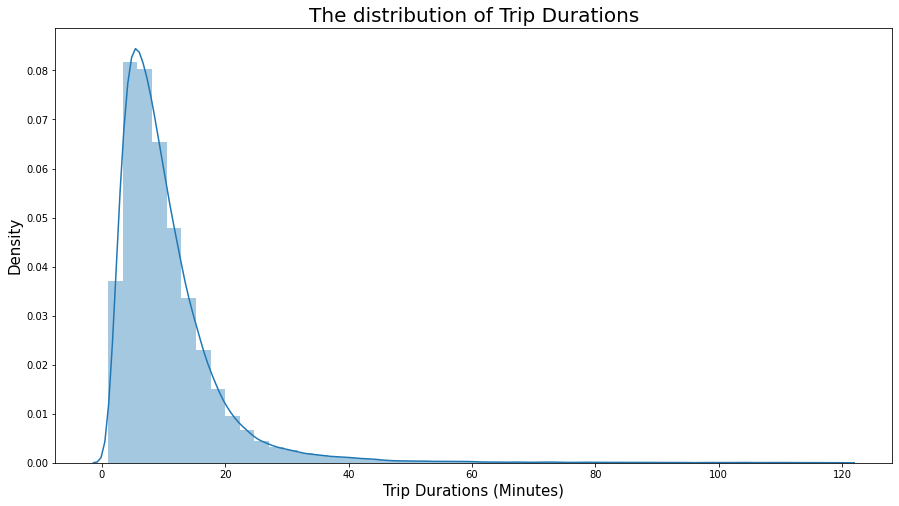

In [15]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.duration_min, ax = ax)
plt.xlabel("Trip Durations (Minutes)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.title("The distribution of Trip Durations", fontsize = 20)
plt.show()

## (Visualization 2)

> In this graph, we inspect the distribution of the age duration accross all users. It appears that most people are aged between 20 and 40 years old.

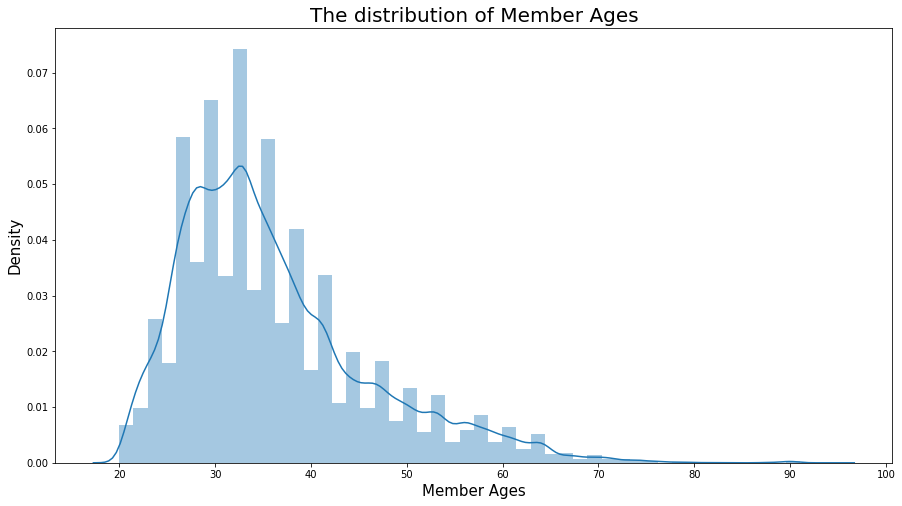

In [16]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.member_age, ax = ax)
plt.xlabel("Member Ages", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.title("The distribution of Member Ages", fontsize = 20)
plt.show()

## (Visualization 3)

> How many males VS females go for rides? The answer is in this graph, we can see that the men's percentage is much higher!

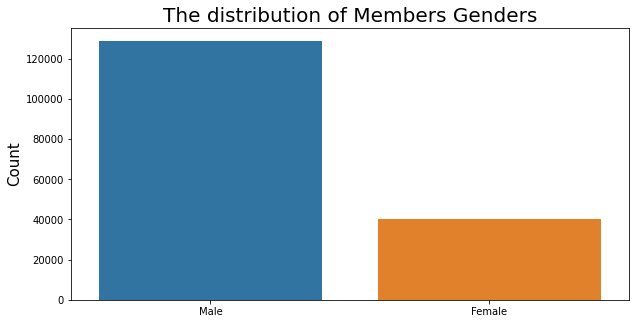

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x='member_gender', data=df)
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.title("The distribution of Members Genders", fontsize = 20)
plt.show()

## (Visualization 4)

> Although, most of the riders are men, but women seem to be more determined! Women have a higher trip duration average than men.

## (Visualization 5)

> In this scatter plot, we can see the relationship between age, trip duration and user type. Younger people seem to be riding for longer times and most people subscribers, not customers!

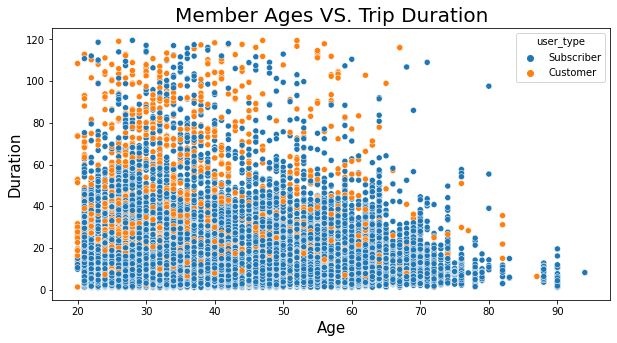

In [18]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x="member_age", y = "duration_min", data = df, hue ="user_type")
plt.title("Member Ages VS. Trip Duration", fontsize = 20)
plt.ylabel("Duration", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Younger people have a higher duration, and most of them are customers
and females

### Were there any interesting or surprising interactions between features?

> A spike in duration in people who are in their 70's